## Computational Calculus Series

# Part 13: Unconstrained optimality conditions

In this post we discuss the foundational calculus-based concepts on which many practical optimization algorithms are built: the zero, first, and second order optimality conditions.  The mathematical problem of finding the smallest point(s) of a function - referred to as a function's *global minimum* (one point) or *global minima* (many) - is centuries old and has applications throughout the sciences and engineering.  The three conditions we discuss here reveal what basic calculus can tell us about how a function behaves near its global minima.  We also discuss the heuristic algorithm *coordinate descent* which - as a simple extension of the first order condition - provides a simple algorithmic approach to finding global minima through solving large systems of simple first order equations.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1.  Unconstrained optimality conditions

In many areas of science and engineering one is interested in finding the smallest points - or the global minima - of a particular function.  For a function $g(\mathbf{w})$ taking in a general $N$ dimensional input $\mathbf{w}$ this problem is formally phrased as 

\begin{equation}
\underset{\mathbf{w}}{\mbox{minimize}}\,\,\,\,g\left(\mathbf{w}\right)
\end{equation}

This says formally 'look over every possible input $\mathbf{w}$ and find the one that gives the smallest value of $g(\mathbf{w})$'.

When a function takes in only one or two inputs we can attempt to identify its minima visually by plotting it over a large swath of its input space.  However this idea completely fails when a function takes in three or more inputs - as we can no longer effectively visualize it.  Because we are visually constrained to such low dimensions as human beings we have to create tools to help us solve this problem more generally.

Thankfully calculus - and in particular the notion of derivative - already provides us with the fundamental tools we need to build robust schemes for finding function minima, regardless of input dimension.   In this Section we look at how first and second order derivatives characterize the minima of a function.  These characterizations are referred to respectively as the *zero order*, *first order*, and the *second order* conditions.  These conditions codify the consistent behavior of a function, as well as its first and second order derivative, near global minima. 

## 1.1  The zero order condition

Let us examine some simple examples to see how to formally characterize the global minima of a function.

#### <span style="color:#a50e3e;">Example 1: </span> Global minima of a quadratic

In the next Python cell we plot the simple quadratic

\begin{equation}
g(w) = w^2
\end{equation}

over a short region of its input space.  Examining the left panel below, what can we say defines the smallest value(s) of the function here?

<IPython.core.display.Javascript object>


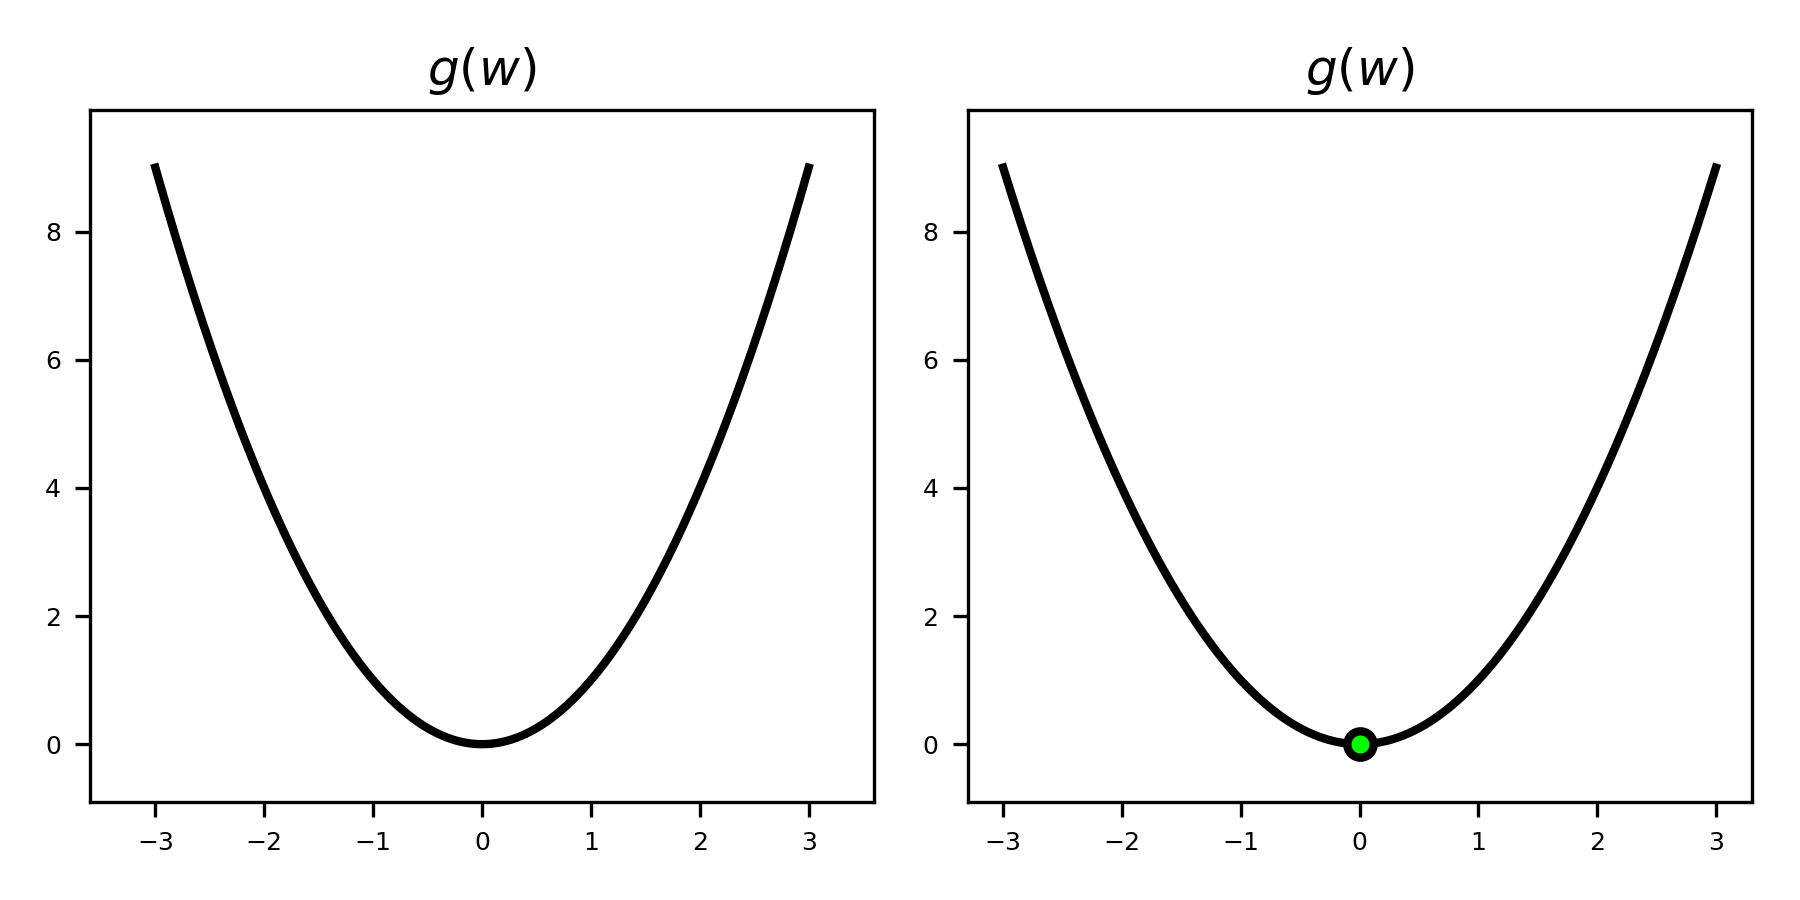

In [2]:
# specify function
func = lambda w: w**2

# use custom plotter to display function
calib.derivative_visualizer.show_stationary_1func(func=func)

The smallest value - the global minimum - seemingly occurs close to $w = 0$ (we mark this point $(0,g(0))$ in the right panel with a green dot). Formally to say this point $w^0 = 0$ gives the smallest point on the function, we say 

\begin{equation}
g(w^0) \leq g(w) \,\,\,\text{for all $w$}
\end{equation}

#### <span style="color:#a50e3e;">Example 2:</span>  Global minima/maxima of a sinusoid

Let us look at the sinusoid function

\begin{equation}
g(w) = \text{sin}(3w)
\end{equation}

plotted by the next Python cell.

<IPython.core.display.Javascript object>


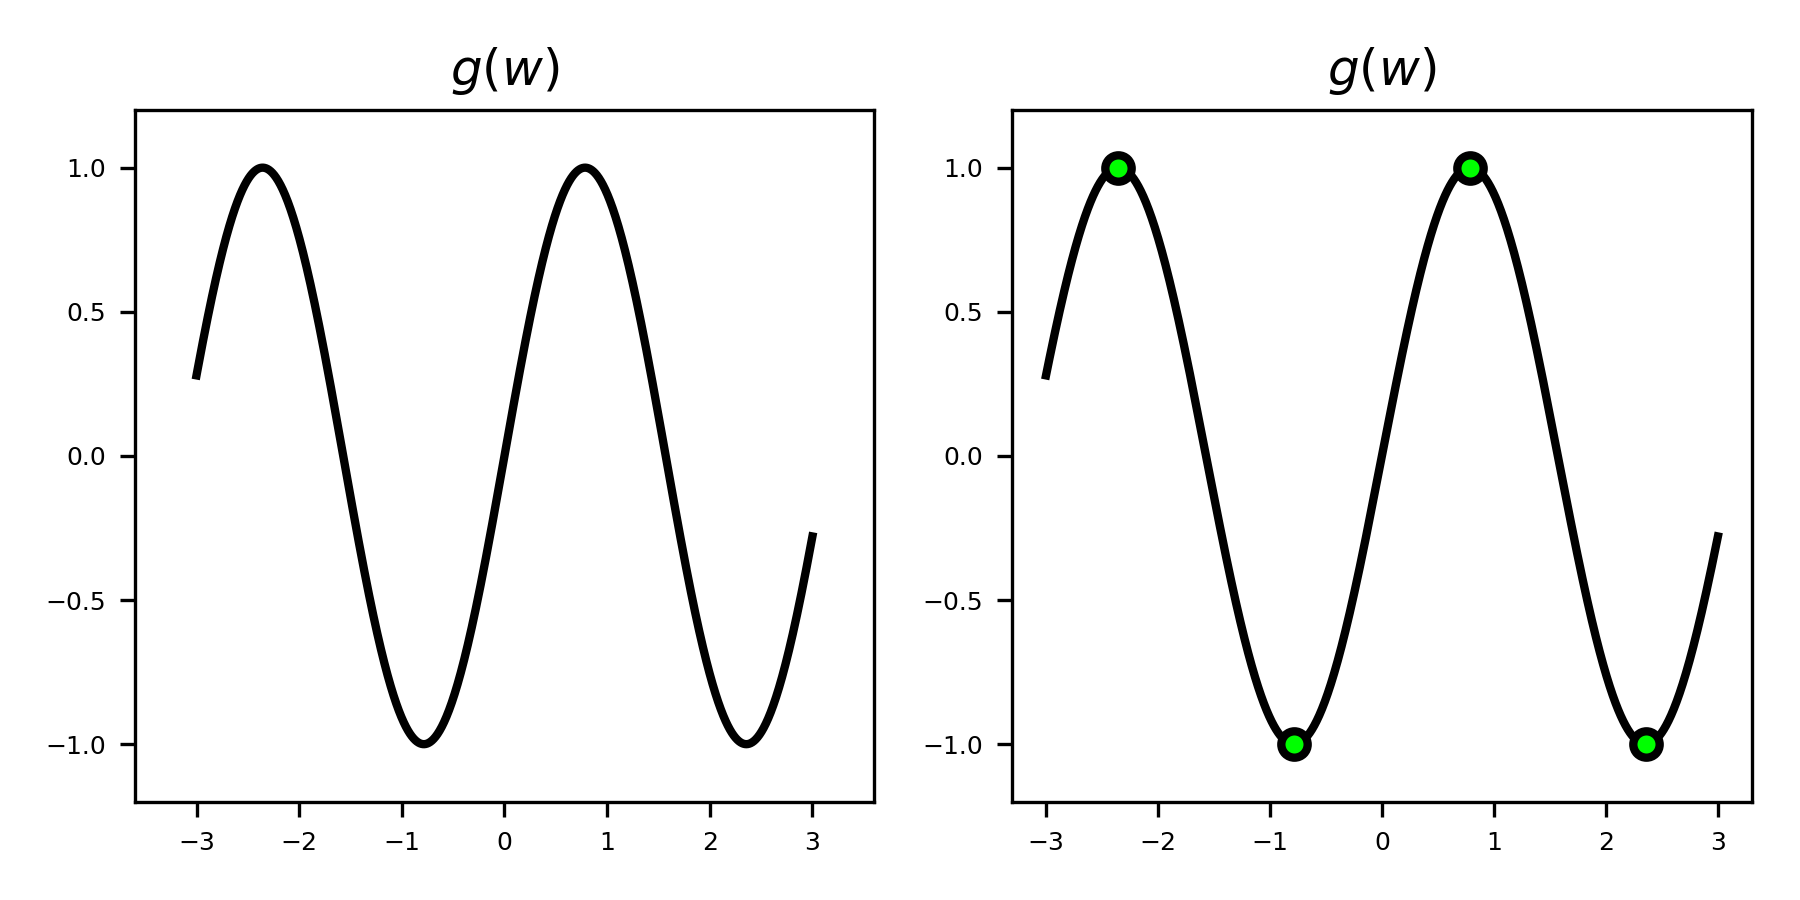

In [3]:
# specify function
func = lambda w: np.sin(2*w)

# use custom plotter to display function
calib.derivative_visualizer.show_stationary_1func(func=func)

Here we can see that there are many global minima - marked green in the right panel - one at every $4k+3$ multiple of $\frac{\pi}{2}$ for integer $k$'s. So to speak more generally we would say that $w^0$ is a global minimum if 

\begin{equation}
g(w^0) \leq g(w) \,\,\,\text{for all $w$}
\end{equation}

We likewise mark the largest points on the function - the *global maxima* - in the right panel, which occur at $4k+1$ multiples of $\frac{\pi}{2}$ for integer $k$'s.  The maxima can be formally defined as those points satisfying the inequality above, only with the $\geq$ sign instead of $\leq$.

#### <span style="color:#a50e3e;">Example 3:</span>  Minima and maxima of the sum of a sinusoid and a quadratic

In the next Python cell we plot the sinusoid

\begin{equation}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation}

over a short region of its input space.  Examining the left panel below, what can we say defines the smallest value(s) of the function here?

<IPython.core.display.Javascript object>


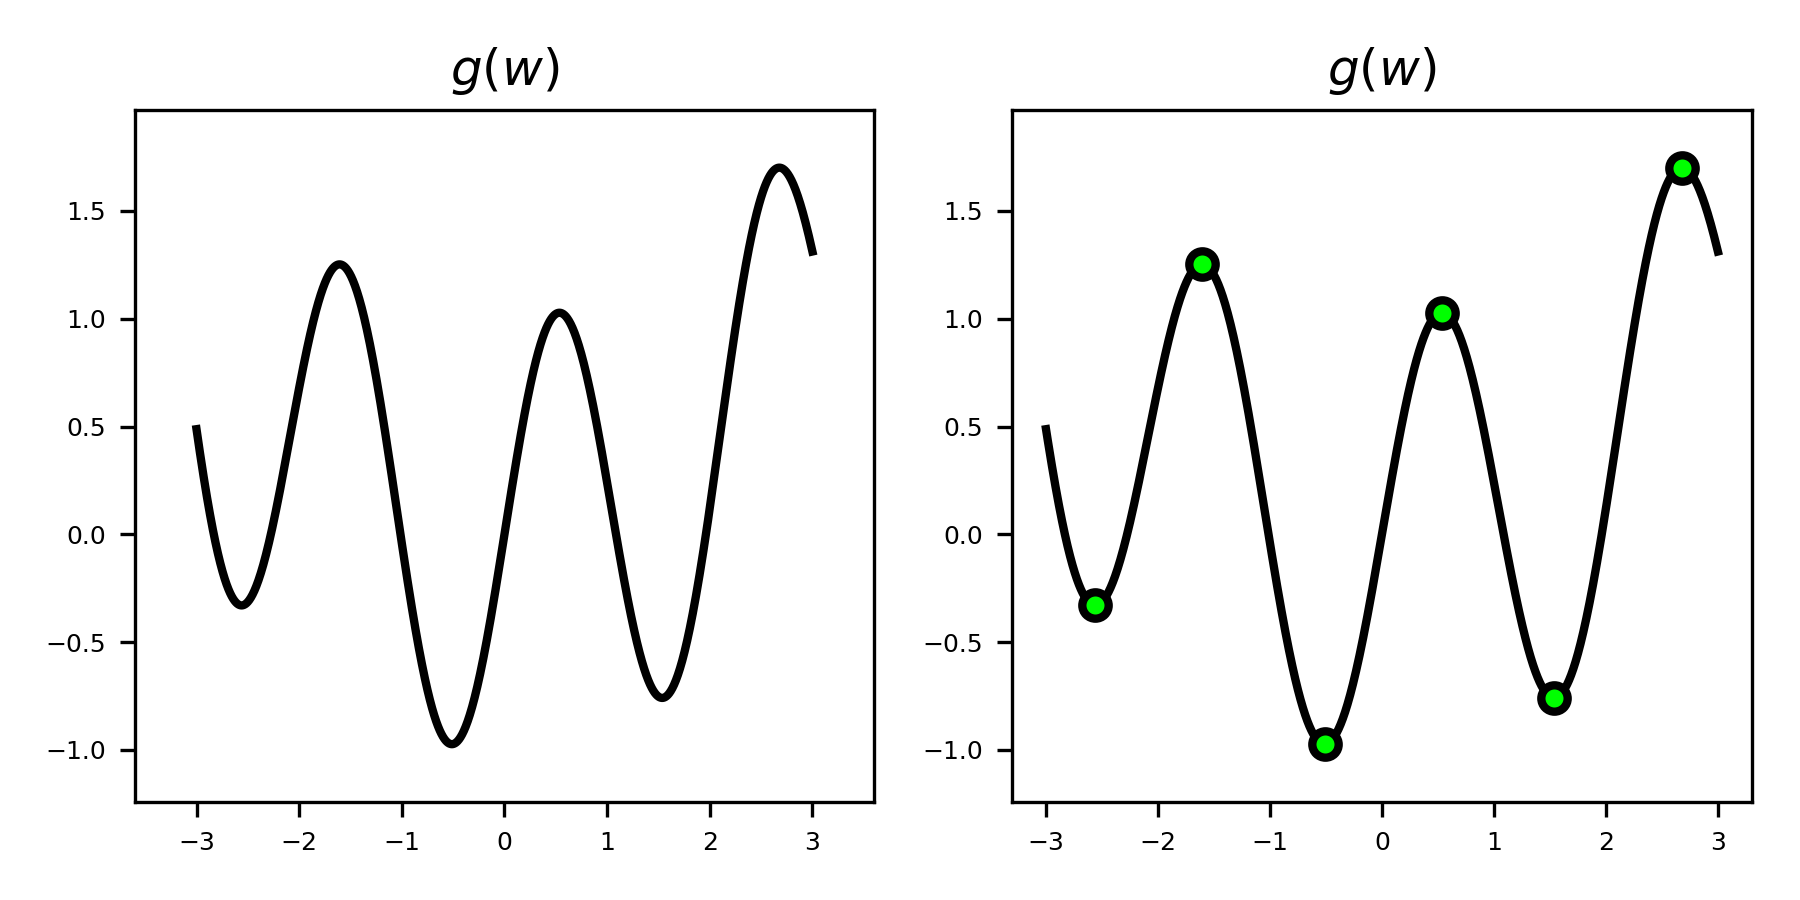

In [4]:
# specify function
func = lambda w: np.sin(3*w) + 0.1*w**2

# use custom plotter to display function
calib.derivative_visualizer.show_stationary_1func(func=func)

Here we have a global minimum around $w = -0.5$ and a global maximum around $w = 2.7$.  We also have minima and maxima that are *locally optimal* - for example the point around $w = 0.8$ is a local maximum.  Likewise the point near $w = 1.5$ is a *local minimum*  - since it is the smallest point on the function nearby.  We can formally say that the point $w^0$ is a local minimum of the function $g(w)$ as

\begin{equation}
g(w^0) \leq g(w) \,\,\,\text{for all $w$ near $w^0$}
\end{equation}

The statement $\text{for all $w$ near $w^0$}$ is relative, and simply describes the fact that the point $w^0$ is smaller than its neighboring points.  The same formal definition can be made for local maximum points as well, switching the $\leq$ sign to $\geq$.

----

From these examples we have seen how to formally define global minima/maxima as well as the local minima/maxima of a function.  These formal definitions directly generalize to a function taking in $N$ inputs - and together constitute the zero order condition for optimality.

> **The zero order condition for optimality:** A point $\mathbf{w}^0$ is 
- a global minimum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^0) \leq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$}$  
- a global maximum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^0) \geq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$}$ 
- a local minimum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^0) \leq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$ near $\mathbf{w}^0$}$  
- a local maximum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^0) \geq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$ near $\mathbf{w}^0$}$  

## 1.2  The first order condition

In the next Python cell we plot a quadratic functions in two and three dimensions, and mark the minimum point on each - called a *global minimum* - with a green point.  Also in green in each panel we  draw the first order Taylor Series approximation - a tangent line/hyperplane - generated by the first derivative(s) at the function's minimum value.  In terms of the behavior of the first order derivatives here we see - in both instances - that the tangent line/hyperplane is perfectly flat, indicating that the first derivative(s) is exactly zero at the minimum.

<IPython.core.display.Javascript object>


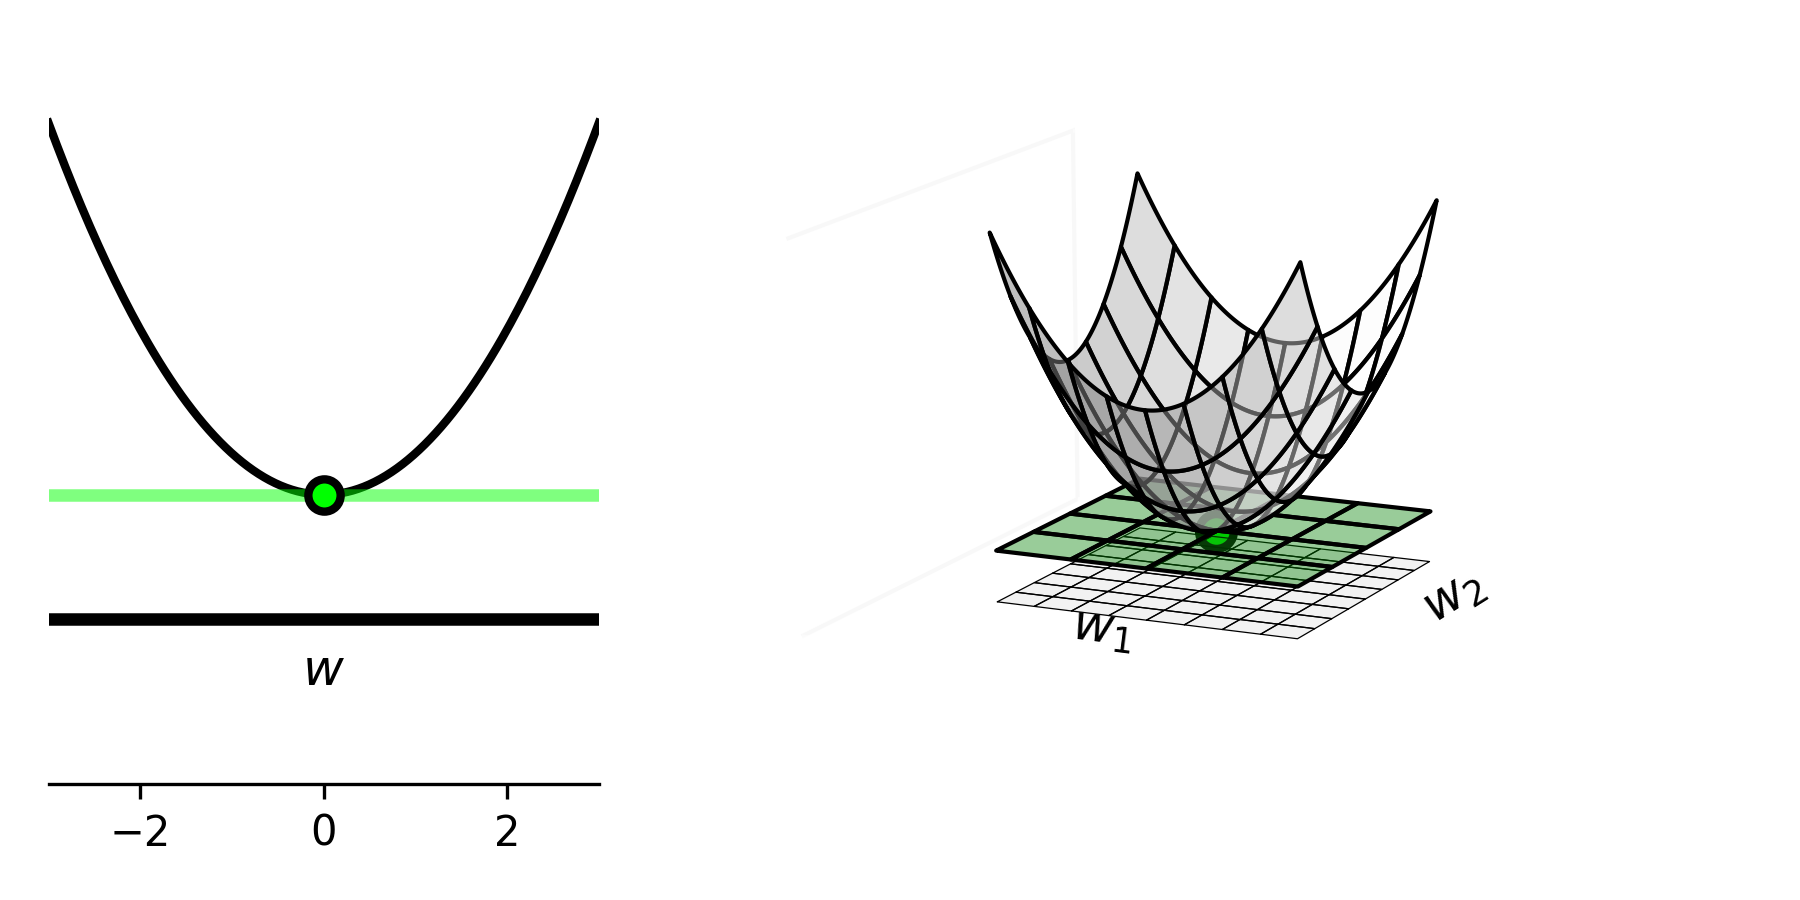

In [10]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w**2  + 3
func2 = lambda w: w[0]**2 + w[1]**2  + 3

# use custom plotter to show both functions
calib.derivative_visualizer.compare_2d3d(func1 = func1,func2 = func2)

This finding is true in general - regardless of the dimension of a function's input - first order derivatives are always zero at the global minima of a function.  This is because minimum values of a function are naturally located at 'valley floors' where a tangent line or hyperplane tangent to the function is perfectly flat, and thus has zero-valued slope(s).

Because the derivative/gradient at a point gives precisely this slope information, the value of first order derivatives provide a convenient way of finding minimum values of a function $g$. When $N=1$ any point $v$ where 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g\left(v\right)=0
\end{equation}

is a potential minimum. Analogously with general $N$ dimensional input, any $N$ dimensional point $\mathbf{v}$ where *every* partial derivative of $g$ is zero, that is

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0
\end{array}
\end{equation}

is a potential minimum. Notice how this is a system of $N$ equations, which can be written more compactly using the gradient - our convenient vectorized listing of these partial derivatives - as 

\begin{equation}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}
\end{equation}

This is an extremely useful characterization of minimum points, and is central to the foundational algorithms of mathematical optimization. However it is not perfect as a cursory check of other simple functions quickly reveals that other types of points have zero derivative(s) as well.  

#### <span style="color:#a50e3e;">Example 4:</span> Finding points of zero derivative for single-input functions graphically

In the next Python cell we plot the three functions

\begin{equation}
\begin{array}
\
g(w) = \text{sin}\left(2w\right) \\
g(w) = w^3 \\
g(w) = \text{sin}\left(3w\right) + 0.1w^2
\end{array}
\end{equation}

in the top row of the figure. For each we mark all the zero derivative points in green and draw the first order Taylor Series approximations/tangent lines there in green as well. Below each function we plot its first derivative, highlighting the points where it takes on the value zero as well (the horizontal axis in each case is drawn as a horizontal dashed black line). 

<IPython.core.display.Javascript object>


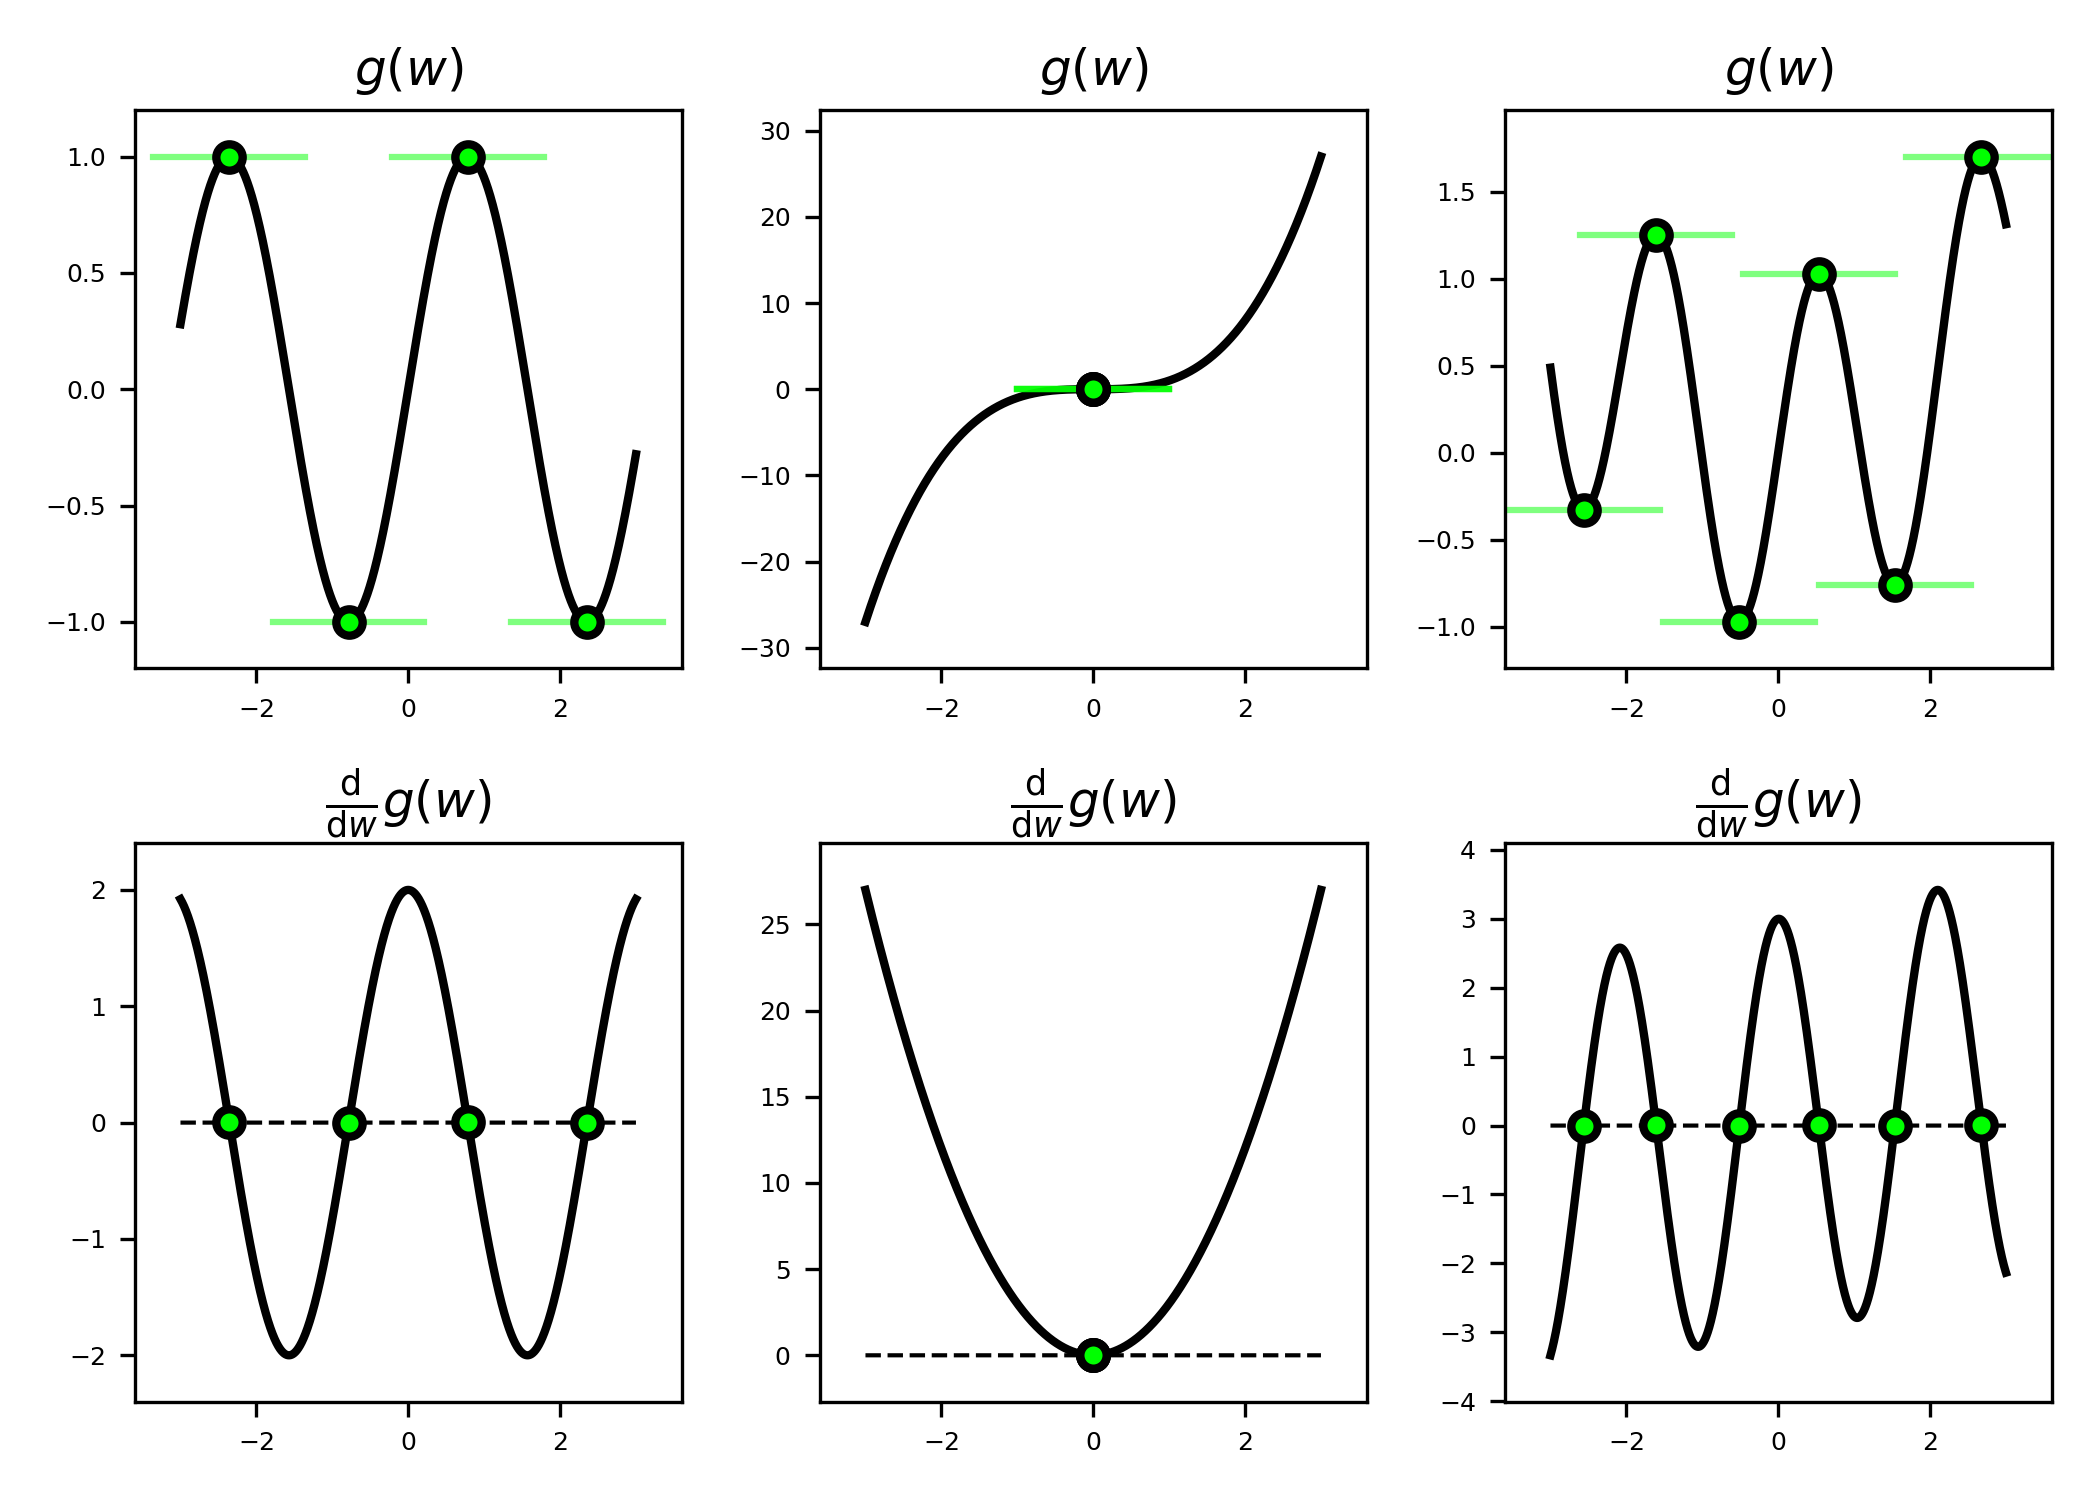

In [6]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: np.sin(2*w)
func2 = lambda w: w**3
func3 = lambda w: np.sin(3*w) + 0.1*w**2

# use custom plotter to show both functions
calib.derivative_visualizer.show_stationary(func1 = func1,func2 = func2,func3 = func3)

-----

Examining these plots we can see that it is not only minima that have zero derivatives, but a variety of other points as well. These consist of 

- *local minima* or points that are the smallest with respect to their immediate neighbors, like the one around the input value $w=2$ in the right panel


- *local maxima* or points that are the largest with respect to their immediate neighbors, like the one around the input value $w=-2$ in the right panel


- *saddle points* like the one shown in the middle panel, that are neither maximal nor minimal with respect to their immediate neighbors

These three examples illustrate the full swath of points having zero-valued derivative(s) - and this includes multi-input functions as well *regardless of dimension*.  Taken together all such points are collectively referred to as *stationary points*.

> Together local/global minima and maxima, as well as saddle points are referred to as *stationary points*. These are points at which a function's derivative(s) take on zero value, i.e., $\frac{\partial}{\partial w}g(w) = 0$.

So - while imperfect - this *first order condition for optimality* does characterize points of a function that include a function's global minima.  Moreover the first order condition allows us to translate the problem of finding global minima to the problem of solving a system of (typically nonlinear) equations, for which many algorithmic schemes have been designed.

> **The first order condition for optimality**: Stationary points of a function $g$ (including minima, maxima, and
saddle points) satisfy the first order condition $\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}$.  This allows us to translate the problem of finding global minima to the problem of solving a system of (typically nonlinear) equations, for which many algorithmic schemes have been designed.

Note: if a function is *convex* - as with the first example in this Section - then the first order condition completely defines its global minima, as a convex function has no maxima or saddle points.

> The first order condition completely defines the global minima of convex functions, as they have no maxima or saddle points.

## 1.3  Examples of using first order condition 'by hand' algebraically

As mentioned, the primary practical benefit of using the first order condition is that it allows us to transform the task of seeking out global minima to that of solving a system of equations, for which a wide range of algorithmic methods have been designed (which we begin describing in the next post). The emphasis here on *algorithmic* schemes is key, as solving a system of equations *by hand* is generally speaking impossible.  Again we emphasize, the vast majority of (nonlinear) systems of equations cannot reasonably be solved by hand.

However there are a handful of relatively simple examples one can compute by hand, or at least one can show algebraically that they reduce to a *linear system of equations* which can be easily solved numerically.  By far the most important of these are the multi-input quadratic function and the highly related *Rayleigh quotient*. We will see the former later on when discussing linear regression, and the latter in a number of instances where we use it as a tool for studying the properties of certain machine learning cost functions.  

#### <span style="color:#a50e3e;">Example 5:</span> Calculating stationary points of some single-input functions algebraically

In this Example we use the first order condition for optimality to compute stationary points of the functions 

\begin{equation}
\begin{array}\\
g\left(w\right)=w^{3} \\
g\left(w\right)=e^{w} \\
g\left(w\right)=\textrm{sin}\left(w\right)\\
g\left(w\right)=a + bw + cw^{2}, \,\,\,c>0 \\
\end{array}
\end{equation}

and will distinguish the kind of stationary point visually for these instances.

- $g\left(w\right)=w^{3}$, plotted in the middle panel of the second figure above, the first order condition gives $g'\left(v\right)=3v^{2}=0$ which we can visually identify as a saddle point at $v=0$.


- $g\left(w\right)=e^{w}$, the first order condition gives $g'\left(v\right)=e^{v}=0$ which is only satisfied as $v$ goes to $-\infty$, giving a minimum.


- $g\left(w\right)=\mbox{sin}\left(w\right)$ the first order condition gives stationary points wherever $g'\left(v\right)=\mbox{cos}\left(v\right)=0$
which occurs at odd integer multiples of $\frac{\pi}{2}$, i.e., maxima at $v=\frac{\left(4k+1\right)\pi}{2}$ and minima at $v=\frac{\left(4k+3\right)\pi}{2}$
where $k$ is any integer. 


- $g\left(w\right)=w^{2}$ for which the first order condition gives $g'\left(v\right)=2cv + b =0$ with a minimum
at $v=\frac{-b}{2c}$.

#### <span style="color:#a50e3e;">Example 6:</span> A simple looking function with difficult to compute (algebraically) global minimum

As mentioned previously the vast majority of functions - or to be more precise the system of equations derived from functions - cannot be solved by hand algebraically.  To get a sense of this challenge here we show an example of a simple-enough looking function whose global minimum is very cumbersome to compute by hand.  

Take the simple degree four polynomial

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}

which is plotted over a short range of inputs containing its global minimum in the next Python cell.

<IPython.core.display.Javascript object>


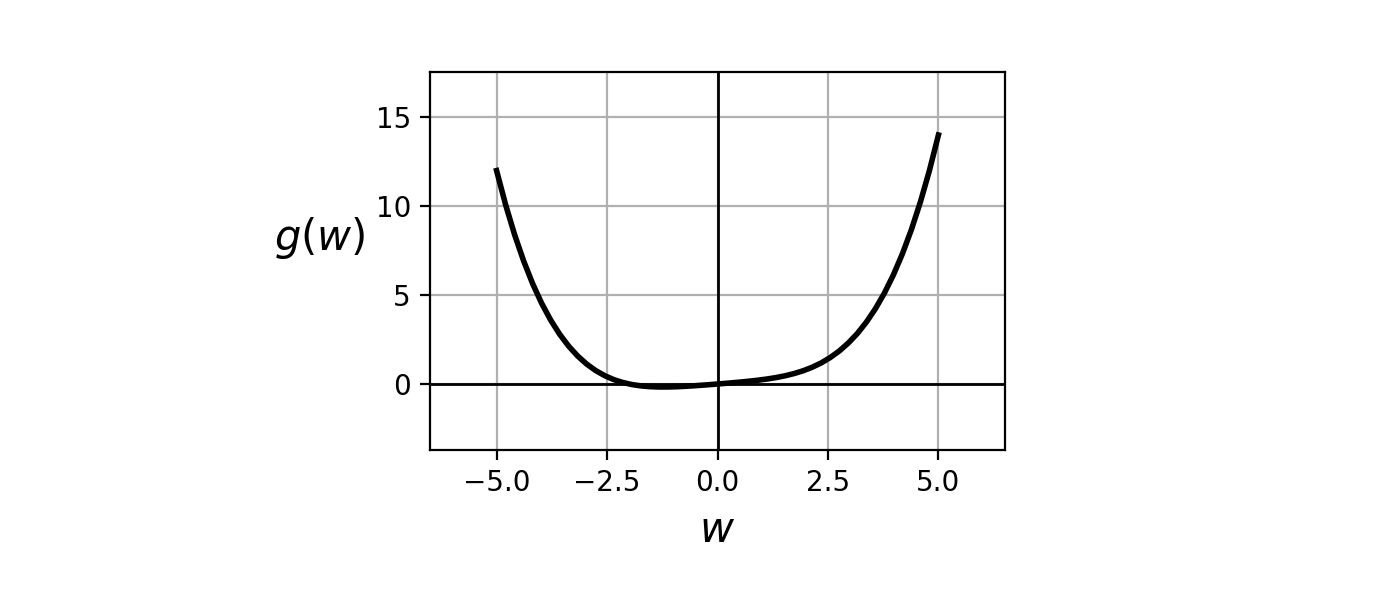

In [7]:
# specify range of input for our function
w = np.linspace(-5,5,50)
g = lambda w: 1/50*(w**4 + w**2 + 10*w)

# make a table of values for our function
func_table = np.stack((w,g(w)), axis=1)

# use custom plotter to display function
baslib.basics_plotter.single_plot(table = func_table,xlabel = '$w$',ylabel = '$g(w)$',rotate_ylabel = 0)

The first order system here can be easily computed as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d} w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10\right) = 0
\end{equation}

which simplifies to

\begin{equation}
2w^3 + w + 5 = 0
\end{equation}

This has three possible solutions, but the one providing the minimum of the function $g(w)$ is 

\begin{equation}
w = \frac{\sqrt[\leftroot{-2}\uproot{2}3]{\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45}}{6^{\frac{2}{3}}} - \frac{1}{\sqrt[\leftroot{-2}\uproot{2}3]{6\left(\sqrt{2031}-45\right)}}
\end{equation}

which can be computed - after much toil - using [centuries old tricks developed for just such problems](http://mathworld.wolfram.com/CubicFormula.html). 

#### <span style="color:#a50e3e;">Example 7:</span> Stationary points of a general multi-input  quadratic function

Take the general multi-input quadratic function

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

where $\mathbf{C}$ is an $N\times N$ symmetric matrix, $\mathbf{b}$ is an $N\times 1$ vector, and $a$ is a scalar.

Computing the first derivative (gradient) we have

\begin{equation}
\nabla g\left(\mathbf{w}\right)=2\mathbf{C}\mathbf{w}+\mathbf{b}
\end{equation}

Setting this equal to zero gives a *symmetric and linear* system of equations of the form

\begin{equation}
\mathbf{C}\mathbf{w}=-\frac{1}{2}\mathbf{b}
\end{equation}

whose solutions are stationary points of the original function.  Note here we have not explicitly solved for these stationary points, but have merely shown that the first order system of equations in this particular case is in fact one of the easiest to solve numerically.

#### <span style="color:#a50e3e;">Example 8:</span> Stationary points of a simple but common quadratic function

A number of applications will find us employing a simple multi-input quadratic

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

where the matrix $\mathbf{C} = \frac{1}{\beta} \mathbf{I}$. Here $\mathbf{I}$ is the $N\times N$ identity matrix, and $\beta > 0$  a positive scalar. With this matrix notice how the quadratic term can be simplified considerably

\begin{equation}
\mathbf{w}^T \mathbf{C} \mathbf{w} = \mathbf{w}^T \frac{1}{\beta} \mathbf{I} \mathbf{w} = \frac{1}{\beta}\mathbf{w}^T \mathbf{w} = \frac{1}{\beta} \Vert \mathbf{w} \Vert^2_2
\end{equation}

The gradient of $g$ is then given as

\begin{equation}
\nabla g(\mathbf{w}) = \frac{2}{\beta} \mathbf{w} + \mathbf{b}
\end{equation}

and setting this equal to zero we can solve explicitly for the single stationary point - which is a global minimum - of this function

$$
\mathbf{w} = -\frac{\beta}{2}\mathbf{b}
$$

#### <span style="color:#a50e3e;">Example 9:</span> The Rayleigh Quotient

The Raleigh Quotient of an $N\times N$ matrix $\mathbf{C}$ is defined as the normalized quadratic function

\begin{equation}
g(\mathbf{w}) = \frac{\mathbf{w}^T\mathbf{C}\mathbf{w}}{\mathbf{w}^T \mathbf{w}}
\end{equation}

Computing, the gradient of this function is given by 

\begin{equation}
\nabla g(\mathbf{w}) = \frac{2}{\mathbf{w}^T \mathbf{w}}\left(\mathbf{C}\mathbf{w} - \frac{\mathbf{w}^T\mathbf{C}\mathbf{w}}{\mathbf{w}^T \mathbf{w}}\mathbf{w}\right)
\end{equation}

Denote by $\mathbf{v}$ and $\lambda$ any eigenvector/eigenvalue pair of $\mathbf{C}$. Then plugging in $\mathbf{v}$ into the gradient we have, since by definition $\mathbf{C}\mathbf{v} = \lambda \mathbf{v}$, that

\begin{equation}
\nabla g(\mathbf{v}) = \frac{2}{\mathbf{v}^T\mathbf{v}}\left(\lambda\mathbf{v}  - \lambda\frac{ \mathbf{v}^T\mathbf{v}}{\mathbf{v}^T\mathbf{v}}\mathbf{v}\right) =\frac{2}{\mathbf{v}^T\mathbf{v}}\left(\lambda\mathbf{v} - \lambda \mathbf{v}\right) = 0
\end{equation}

In other words, the eigenvectors of $\mathbf{C}$ are stationary points of the Raleigh Quotient.  By plugging the stationary point/eigenvector $\mathbf{v}$ into the original function we can see that it takes the value $\lambda$ given by the corresponding eigenvalue

\begin{equation}
g(\mathbf{v}) = \frac{\mathbf{v}^T\mathbf{C}\mathbf{v}}{\mathbf{v}^T \mathbf{v}} = \lambda\frac{\mathbf{v}^T\ \mathbf{v}}{\mathbf{v}^T \mathbf{v}} = \lambda
\end{equation}

In particular this shows that the maximum value taken by the Raleigh Quotient is given by the maximum eigenvalue of $\mathbf{C}$, and likewise at its minimum the function takes on the value of the minimum eigenvalue of $\mathbf{C}$. 

## 1.4 Coordinate descent

We have just seen that the first order condition for optimality is a powerful calculus-based way of characterizing the minima of a function.  However rarely can we use it in practice to actually solve the first order systems of equations 'by hand' that it entails in order to recover the function minima.  Why? First and foremost, even with a single variable $g(w)$ this system - which reduces to a single equation - can be difficult to impossible to solve by hand (see e.g., Example 6 above).  Greatly compounding this issue is the fact that solving a system of $N$ simultaneous equations 'by hand' - even when each individual equation is extremely simple (e.g., a linear combination) - is virtually impossible. 

Here we describe a heuristic mathematical optimization algorithm called *coordinate descent* - that is specifically designed to deal with the latter problem (the *simultaneous* system of $N$ equations part).  It is perhaps the first thing one might try in order to salvage the first order condition as a way of directly finding local minima of large first order systems consisting of relatively simple equations.  Essentially we do something very lazy: instead of trying to solve the equations *simultaneously* in every input at once, we solve it *sequentially*, one equation and one input at a time.  That is, we cycle through the first order equations solving the $n^{th}$ equation

\begin{equation}
\frac{\partial}{\partial w_n}g(\mathbf{w}) = 0
\end{equation}

for the $n^{th}$ variable $w_n$ alone.  Cycling through the first order equations a number of times this produces a solution for simple first order systems that does indeed match the solution derived by solving such systems simultaneously.  The pseudo-code for coordinate descent is given below.

### Coordinate descent algorithm

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; <strong>Input:</strong> initial point $\mathbf{w}^0$, maximum number of steps $K$ <br>


<strong>2:</strong>&nbsp;&nbsp; <code>for</code> $\,\,k = 1...K$<br>


<strong>3:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>for</code> $n=1...N$ <br>


<strong>4:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; solve $\frac{\partial}{\partial w_n}g(\mathbf{w}) = 0$ in $w_n$ alone setting $w_j = w_j^{k-1}$ for $j\neq n$, giving $w_n^{k}$ <br>

<strong>5:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; update  $w_n^{k-1} \longleftarrow w_n^{k}$ <br>

<strong>6:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code> end for</code> <br>

<strong>7:</strong>&nbsp;&nbsp; <code>end for</code><br>

<strong>8:</strong>&nbsp;&nbsp; <strong>output:</strong> $\mathbf{w}^{K}$ <br>

<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>


As simple as this heuristic is, coordinate descent and simple extensions of it are extremely popular in machine learning, being a widely used optimization method for a number of machine learning problems including K-Means clustering, nonnegative matrix factorization problems, recommender systems and general matrix factorization problems, and boosting.

#### <span style="color:#a50e3e;">Example 10:</span>  Minimizing a convex quadratic via coordinate descent

In this example we develop the coordinate descent for minimizing the convex quadratic function

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

In practice we almost never care about finding the minimum of a function that dips down to negative infinity, so in keeping with this we will assume that the matrix $\mathbf{C}$ is both symmetric and has all nonnegative eigenvalues like the one we plot in the next Python cell.  This quadratic has matrix $\mathbf{C} = \begin{bmatrix} \,\,\,\,\,5 \,\,\, -3 \\ -3 \,\,\,\,\,\,\,\, 5 \end{bmatrix}$ and $\mathbf{b} = \mathbf{0}_{2\times 1}$ and $a = 0$.  In the left panel we show the surface plot of this function, while on the right we show its contour plot (here the contours are colored dark to light as the function gets smaller).  

<IPython.core.display.Javascript object>


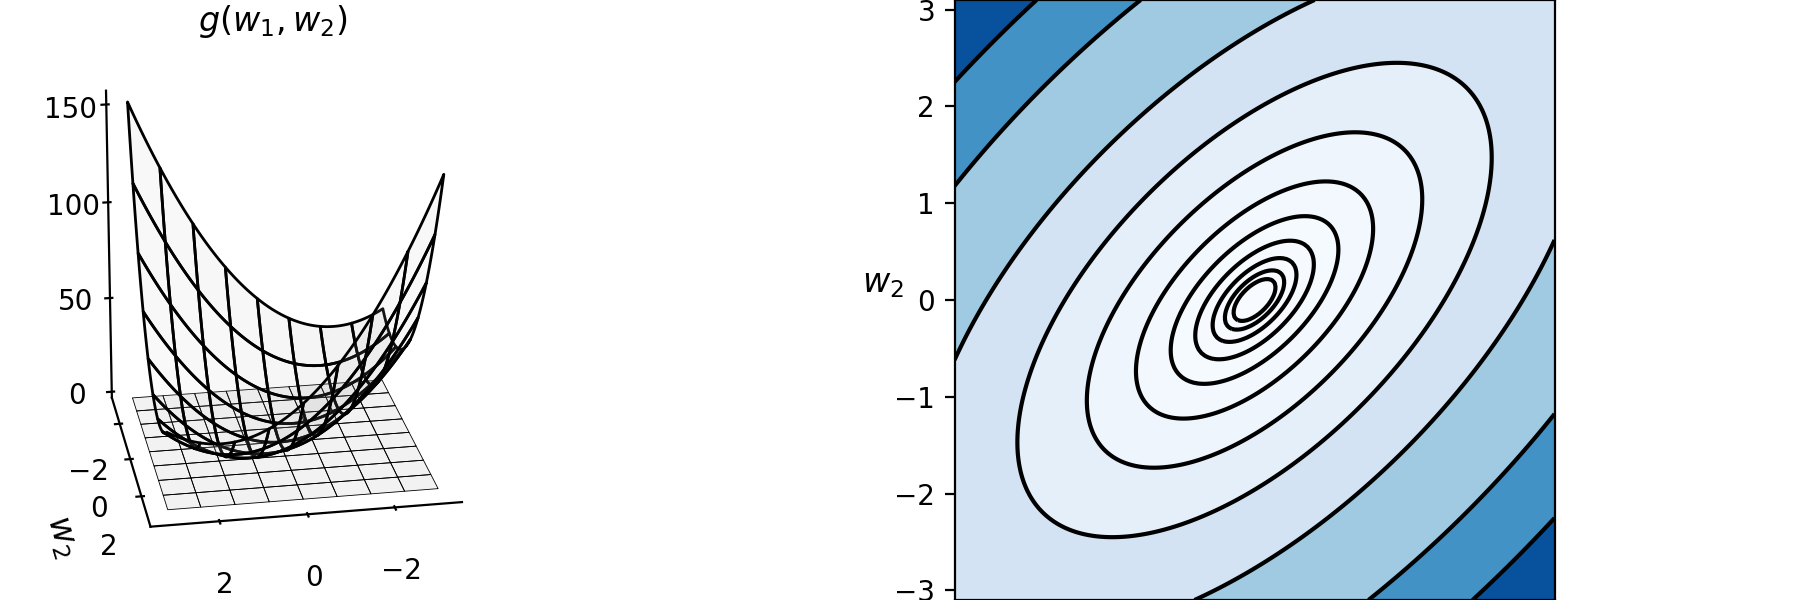

In [8]:
# what function should we play with?  Defined in the next line.
g = lambda w: 5*w[0]**2 + 5*w[1]**2 - 6*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.plot3d.visualizer();

demo.draw_2d(g,num_contours = 30,view = [20,80])

In Example 7 we saw that the first order system for a quadratic is linear and given by

\begin{equation}
\nabla g(\mathbf{w}) = 2\mathbf{C}\mathbf{w} + \mathbf{b} = \mathbf{0}_{N\times 1}
\end{equation}

or if we write out the system equation-wise

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{w})= 2\left(c_{11}w_1 + c_{12}w_2 + c_{13}w_3 +  \cdots + c_{1N}w_N\right) + b_1 = 0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{w})=2\left(c_{21}w_1 + c_{22}w_2 + c_{23}w_3 + \cdots + c_{2N}w_N\right) + b_2 = 0\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{w})=2\left(c_{N1}w_1 + c_{N2}w_2 + c_{N3}w_3 +  \cdots + c_{NN}w_N\right) + b_N = 0
\end{array}
\end{equation}

Instead of solving this system *simultaneously* we can try to solve it *sequentially* - staring with the top equation $\frac{\partial}{\partial w_{1}}g(\mathbf{w}) = 0$ and going down to the final equation $\frac{\partial}{\partial w_{N}}g(\mathbf{w})= 0$. To begin we initialize at a random point

$$\mathbf{w}^0 = \begin{bmatrix} w_1^0 \\ w_2^0 \\ \vdots \\ w_N^0 \end{bmatrix}$$

which we will be sequentially updating, one element at a time.

Notice how when viewed apart from the other at any given point the first equation $\frac{\partial}{\partial w_{1}}g(\mathbf{w}) = 0$ is a function of $w_1$ alone, the other variables being fixed $w_j = w_j^{0}$ for $j \neq 1$.  If we solve for $w_1$ in this equation we get an updated value $w_1^1$

\begin{equation}
w_1^1 = -\frac{c_{12}^{\,}w_2^0 +c_{13}^{\,}w_3^0 +  \cdots + c_{1N}^{\,}w_N^0 + \frac{1}{2}b_1^{\,}}{c_{11} }
\end{equation}

With this value in hand we reset $w_1^0 \longleftarrow w_1^1$ and we can then solve the second equation $\frac{\partial}{\partial w_{2}}g(\mathbf{w}) = 0$.  Fixing every variable but $w_2$ to its current value we can then solve for an update $w_2^1$ by rearranging

\begin{equation}
w_2^1 = -\frac{c_{21}^{\,}w_1^1 + c_{23}^{\,}w_3^0 + \cdots + c_{2N}^{\,}w_N^0 + \frac{1}{2}b_2^{\,}}{c_{22} }
\end{equation}

Updating our second value $w_2^0 \longleftarrow w_2^1$ we can likewise solve the third equation to  update the third variable $w_3^1$ by similarly rearranging it, which gives

\begin{equation}
w_3^1 = -\frac{c_{31}^{\,}w_1^1 + c_{32}^{\,}w_2^1 + \cdots + c_{3N}^{\,}w_N^0 + \frac{1}{2}b_3^{\,}}{c_{33} }
\end{equation}

Updating the third value $w_3^0 \longleftarrow w_3^1$ we can continue this for the general $n^{th}$ equation update as well

\begin{equation}
w_n^1 = -\frac{c_{n1}^{\,}w_1^1 + c_{n2}^{\,}w_2^1 + \cdots + c_{nN}^{\,}w_N^0 + \frac{1}{2}b_n^{\,}}{c_{nn} }
\end{equation}

until solving all $N$ equations at which time we have the updated point 

\begin{equation}
\mathbf{w}^1 = \begin{bmatrix} w_1^1 \\ w_2^1 \\ \vdots \\ w_N^1 \end{bmatrix}
\end{equation}

We can then repeat these computations - taking another sweep through the first order equations - using $\mathbf{w}^1$ to further refine our solution.

We perform these calculations for the particular quadratic function displayed above, sweeping through the first order system 7 times, and display the resulting path the solutions takes as each equation is solved.  In the left panel we display this by literally plotting the path of the solution on top of the contours of the function, while in the left panel we plot the value of the function at each point.  Indeed after 7 passes through the first order system (which here consists of only two equations) we find a point very close to the minimum of the function at the origin (and further iterations can get us even closer).  Notice in the left plot how the path of the solution always  moves in parallel to a coordinate axis since we are repeatedly shrinking the function alone each input variable. 

<IPython.core.display.Javascript object>


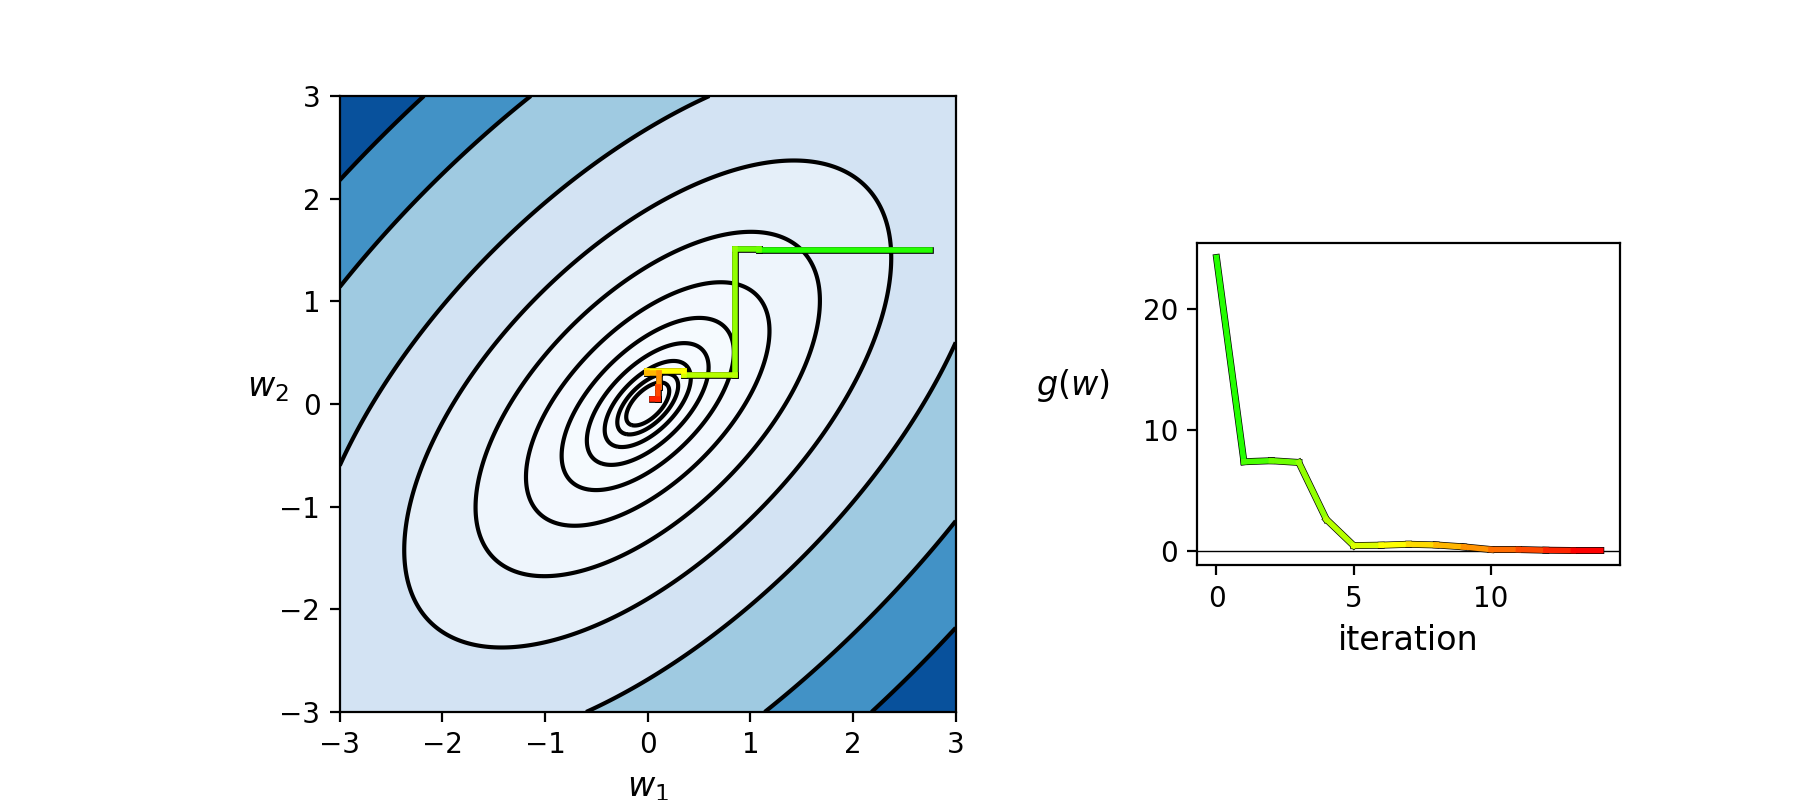

In [9]:
# what function should we play with?  Defined in the next line.
g = lambda w: 5*w[0]**2 + 5*w[1]**2 - 6*w[0]*w[1]

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.coordinate_descent.visualizer();
w_init = [2.75,1.5]; max_its = 7;

demo.run(g,w_init,max_its,num_contours = 30,xmin = -3, xmax = 3, ymin = -3, ymax = 3,pts = 'on',linewidth=2)

## 1.5  The second order condition

Suppose we could compute the complete set of stationary points for some function $g(\mathbf{w})$.  To determine the global minima we can just plug in each stationary point into $g$, and those providing the lowest value must be global minima.  However these evaluations do not help us identify other kinds of stationary points, local minima/maxima and saddle points, as simply having these yields no information about their identities. 

In our Vital Elements of Calculus series we described how second order derivatives determine whether or not a function is convex or concave at a particular point.  More specifically for a single-input function $g(w)$ we saw how $g$ is convex at a point $w^0$ if and only if $\frac{\partial^2}{\partial w^2}g(w) \geq 0$ (and likewise is concave if $\frac{\partial^2}{\partial w^2}g(w) \leq 0$).  

#### <span style="color:#a50e3e;">Example 11:</span> Determining the identity of stationary points graphically

Studying a few simple examples - like those we have already seen - it is easy to come to some far-reaching conclusions about how the second derivative helps unveil the identity of stationary points.  In the next Python cell we re-plot the three single-input functions used above, along with their first and second order derivatives.  We mark in green the evaluation of all stationary points by the function in green (where we also show the tangent line in green), as well as the evaluations by the first and second derivatives marking each evaluation in green.  In the first and second derivative panels we draw the horizontal zero axis as a dashed black line.

<IPython.core.display.Javascript object>


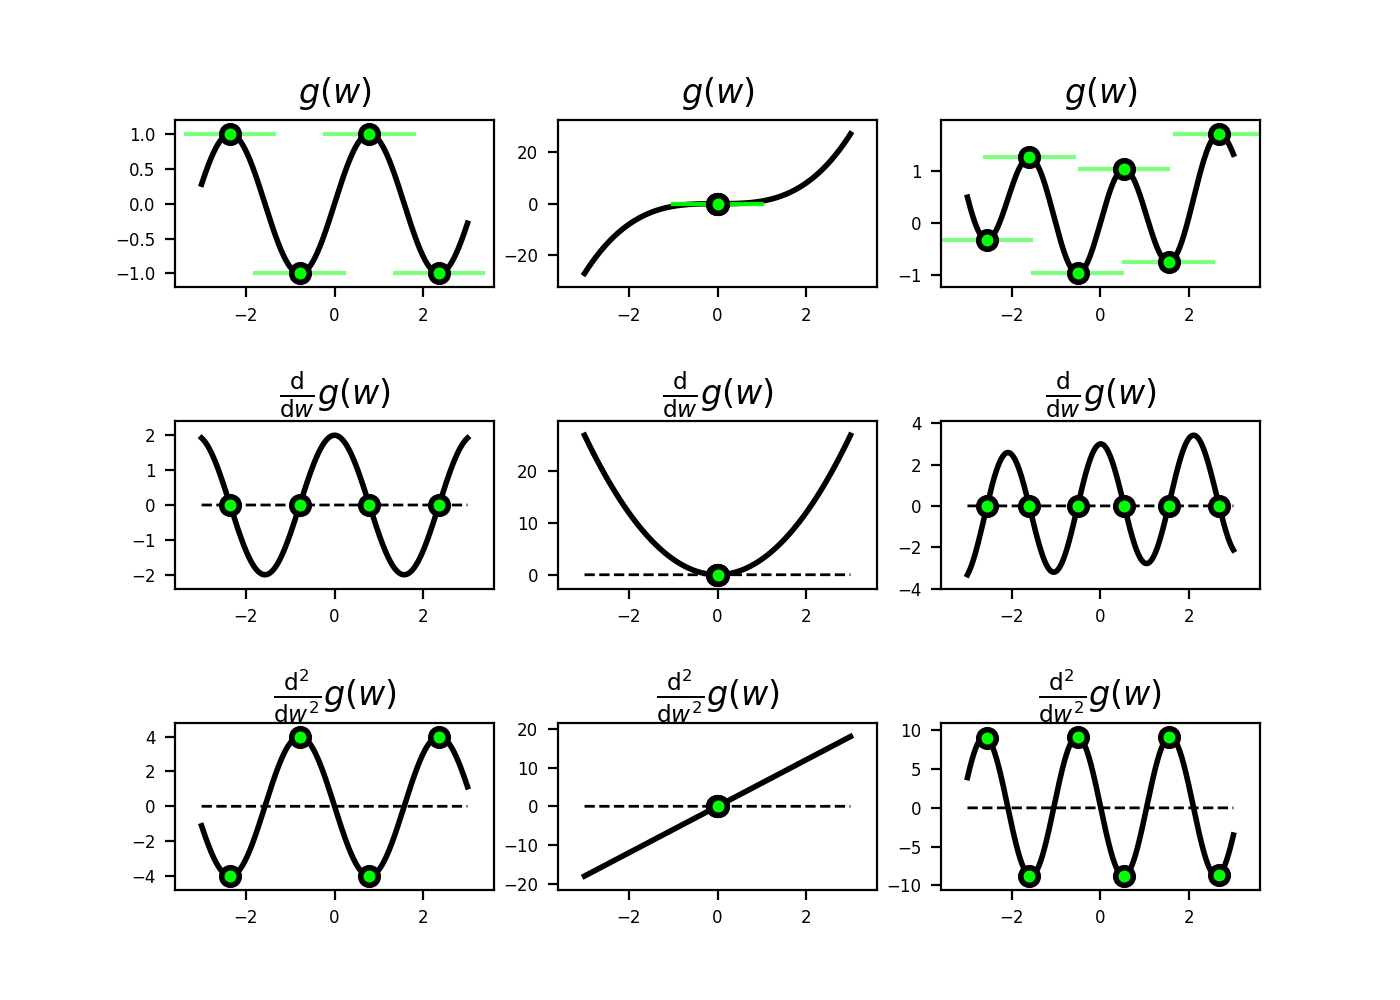

In [10]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: np.sin(2*w)
func2 = lambda w: w**3
func3 = lambda w: np.sin(3*w) + 0.1*w**2

# use custom plotter to show both functions
calib.derivative_visualizer.show_stationary_v2(func1 = func1,func2 = func2,func3 = func3)

----

Studying these simple examples we can see that a stationary point $w^0$ is a

- local minimum if $\frac{\partial^2}{\partial w^2}g(w) > 0$ (since it occurs at *convex* portions of a function)


- local maximum if  $\frac{\partial^2}{\partial w^2}g(w) < 0$ (since it occurs at *concave* portions of a function)


- saddle point if  $\frac{\partial^2}{\partial w^2}g(w) = 0$ and $\frac{\partial^2}{\partial w^2}g(w)$ changes sign at $w$ (since it occurs at an *inflection point* of a function, i.e., where a function goes from concave to convex or vice-versa)

These characteristics hold in general as well for arbitrary single-input functions, and taken together are referred to as the *second order condition for optimality*.  So - in short - the value of the second derivative at a stationary point $w^0$ helps us identify whether it is a local minima, local maxima, or saddle point.

With multi-input functions the analogous second order condition holds. As with all things having to do with convexity/concavity and the second order derivative matrix (a.k.a. the Hessian) the rule translates to the *eigenvalues of the Hessian*.  More specifically a stationary point $\mathbf{w}^0$ of a multi-input function $g(\mathbf{w}^0)$ is

- a local minimum if all eigenvalues of $\nabla^2 g(\mathbf{w}^0)$ are positive (since it occurs at *convex* portions of a function)


- a local maximum if all eigenvalues of $\nabla^2 g(\mathbf{w}^0)$ are negative (since it occurs at *concave* portions of a function)


- a saddle point if the eigenvalues of $\nabla^2 g(\mathbf{w}^0)$ are of mixed values (i.e., some are negative, some are positive) (since it occurs at an *inflection point* of a function)

These rules reduce to those just stated for single-input functions when $N=1$ since then the Hessian matrix collapses into a single second order derivative. 

> **Second order condition for optimality**: the second derivative(s) of a function can determine whether a stationary point is a local minimum, local maximum, or saddle point.  Generally speaking a stationary point $\mathbf{w}^0$ is a local minimum, local maximum, or saddle point if the eigenvalues of $\nabla^2 g(\mathbf{w}^0)$ are all positive, negative, or mixed, respectively.

While the second order condition is a helpful theoretical tool, we will see that it does not offer much practical assistance in the determination of global minima.